## Análise de dados projedo valor do combustível no Brasil

### Importando bibliotecas

* pandas
* numpy
* matplotlib
* seaborn
* re
* time
* math


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import math
import plotly.express as px
import ipywidgets as widgets

In [2]:
#! pip install jupyter-dash

In [3]:
base = pd.read_csv('dados_limpos.csv')
base

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
0,PR,CASCAVEL,CENTRO,GASOLINA,2022-01-04,7.210,R$ / litro
1,PR,CASCAVEL,CENTRO,ETANOL,2022-01-04,5.110,R$ / litro
2,PR,CASCAVEL,CENTRO,GASOLINA ADITIVADA,2022-01-04,7.230,R$ / litro
3,PR,CASCAVEL,CENTRO,GASOLINA,2022-01-04,7.290,R$ / litro
4,PR,CASCAVEL,CENTRO,ETANOL,2022-01-04,5.190,R$ / litro
...,...,...,...,...,...,...,...
54955,ES,ARACRUZ,CENTRO,GASOLINA,2022-04-27,7.690,R$ / litro
54956,ES,ARACRUZ,CENTRO,GASOLINA ADITIVADA,2022-04-27,7.690,R$ / litro
54957,ES,ARACRUZ,CENTRO,ETANOL,2022-04-27,6.490,R$ / litro
54958,MG,ARAXA,CENTRO,ETANOL,2022-04-28,5.899,R$ / litro


In [4]:
base[['Estado', 'Municipio', 'Produto']].value_counts()

Estado  Municipio              Produto           
SP      SAO PAULO              ETANOL                588
                               GASOLINA              584
                               GASOLINA ADITIVADA    514
CE      FORTALEZA              GASOLINA              403
                               ETANOL                393
                                                    ... 
PA      XINGUARA               GASOLINA                1
RS      URUGUAIANA             ETANOL                  1
PA      CONCEICAO DO ARAGUAIA  ETANOL                  1
        XINGUARA               ETANOL                  1
                               GASOLINA ADITIVADA      1
Length: 1330, dtype: int64

In [5]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(base['Valor de Venda'])

6.995

In [6]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [7]:
quantile(base['Valor de Venda'], 0.10)
quantile(base['Valor de Venda'], 0.25)
quantile(base['Valor de Venda'], 0.75)
quantile(base['Valor de Venda'], 0.90)

7.75

In [8]:
base['Valor de Venda'].describe()

count    54960.000000
mean         6.718192
std          0.947426
min          4.099000
25%          5.900000
50%          6.995000
75%          7.440000
max          8.999000
Name: Valor de Venda, dtype: float64

In [9]:
base

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
0,PR,CASCAVEL,CENTRO,GASOLINA,2022-01-04,7.210,R$ / litro
1,PR,CASCAVEL,CENTRO,ETANOL,2022-01-04,5.110,R$ / litro
2,PR,CASCAVEL,CENTRO,GASOLINA ADITIVADA,2022-01-04,7.230,R$ / litro
3,PR,CASCAVEL,CENTRO,GASOLINA,2022-01-04,7.290,R$ / litro
4,PR,CASCAVEL,CENTRO,ETANOL,2022-01-04,5.190,R$ / litro
...,...,...,...,...,...,...,...
54955,ES,ARACRUZ,CENTRO,GASOLINA,2022-04-27,7.690,R$ / litro
54956,ES,ARACRUZ,CENTRO,GASOLINA ADITIVADA,2022-04-27,7.690,R$ / litro
54957,ES,ARACRUZ,CENTRO,ETANOL,2022-04-27,6.490,R$ / litro
54958,MG,ARAXA,CENTRO,ETANOL,2022-04-28,5.899,R$ / litro


In [10]:
df = base[base['Estado'] == 'SP']
df

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
49,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,7.059,R$ / litro
50,SP,SERTAOZINHO,CENTRO,ETANOL,2022-01-04,4.749,R$ / litro
51,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.990,R$ / litro
52,SP,SERTAOZINHO,CENTRO,ETANOL,2022-01-04,4.690,R$ / litro
53,SP,SERTAOZINHO,CENTRO,GASOLINA ADITIVADA,2022-01-04,7.000,R$ / litro
...,...,...,...,...,...,...,...
54940,SP,AVARE,JARDIM BRASIL,ETANOL,2022-04-26,4.999,R$ / litro
54941,SP,AVARE,JARDIM BRASIL,GASOLINA,2022-04-26,6.489,R$ / litro
54945,SP,BAURU,JARDIM ESTORIL,GASOLINA,2022-04-28,6.899,R$ / litro
54946,SP,BAURU,JARDIM ESTORIL,GASOLINA ADITIVADA,2022-04-28,6.999,R$ / litro


In [11]:
# Base de dados preço da Gasolina em SP 
base_SP = df[df['Produto'] == 'GASOLINA']
base_SP.drop(['Estado', 'Municipio', 'Bairro'], axis=1, inplace=True)
base_SP

/var/folders/4q/d8w2y97d1j183kr7xlhfbt980000gn/T/ipykernel_48955/2342301219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_SP.drop(['Estado', 'Municipio', 'Bairro'], axis=1, inplace=True)


,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
49,GASOLINA,2022-01-04,7.059,R$ / litro
51,GASOLINA,2022-01-04,6.990,R$ / litro
54,GASOLINA,2022-01-04,6.970,R$ / litro
112,GASOLINA,2022-01-04,6.899,R$ / litro
114,GASOLINA,2022-01-04,6.999,R$ / litro
...,...,...,...,...
54905,GASOLINA,2022-04-25,7.029,R$ / litro
54917,GASOLINA,2022-04-28,6.799,R$ / litro
54926,GASOLINA,2022-04-25,6.999,R$ / litro
54941,GASOLINA,2022-04-26,6.489,R$ / litro


In [12]:
df_valor_de_venda = base_SP['Valor de Venda']
df_valor_de_venda.to_csv('valor_venda_SP.csv', index=False)

In [13]:
base_valor = pd.read_csv('valor_venda_SP.csv')
base_valor

,Valor de Venda
0,7.059
1,6.990
2,6.970
3,6.899
4,6.999
...,...
6056,7.029
6057,6.799
6058,6.999
6059,6.489


In [14]:
base_valor['media'] = base_valor['Valor de Venda'].mean()
base_valor

,Valor de Venda,media
0,7.059,6.925709
1,6.990,6.925709
2,6.970,6.925709
3,6.899,6.925709
4,6.999,6.925709
...,...,...
6056,7.029,6.925709
6057,6.799,6.925709
6058,6.999,6.925709
6059,6.489,6.925709


In [15]:
# Base de dados preço do Etanol em SP 
base_SP_Etanol = df[df['Produto'] == 'ETANOL']
base_SP_Etanol['Valor de Venda'].mean()

5.117648184494603

In [16]:
base_SP_Etanol['Valor de Venda'].describe().round(3)
base_SP_Etanol

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
50,SP,SERTAOZINHO,CENTRO,ETANOL,2022-01-04,4.749,R$ / litro
52,SP,SERTAOZINHO,CENTRO,ETANOL,2022-01-04,4.690,R$ / litro
55,SP,SERTAOZINHO,CENTRO,ETANOL,2022-01-04,4.690,R$ / litro
113,SP,ARACATUBA,JARDIM PAULISTA,ETANOL,2022-01-04,4.399,R$ / litro
115,SP,ARACATUBA,JD UMUARAMA,ETANOL,2022-01-04,4.599,R$ / litro
...,...,...,...,...,...,...,...
54906,SP,LINS,VILA SAO JOSE,ETANOL,2022-04-25,5.099,R$ / litro
54918,SP,MOGI GUACU,JARDIM SOARES,ETANOL,2022-04-28,5.199,R$ / litro
54927,SP,SANTO ANDRE,VILA GUIOMAR,ETANOL,2022-04-25,5.499,R$ / litro
54940,SP,AVARE,JARDIM BRASIL,ETANOL,2022-04-26,4.999,R$ / litro


In [17]:
# Criando base de dados para Municipio de SP
base_Municipio = df[df['Municipio']== 'SAO PAULO']

In [18]:
base_gasolina = df[df['Produto'] == 'GASOLINA']
#base_Municipio['Etanol'] = base_Municipio[base_Municipio['Produto'] == 'ETANOL']

In [19]:
base_Municipio =  base_Municipio.drop_duplicates().dropna()

In [20]:
base_Municipio

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
4540,SP,SAO PAULO,BOM RETIRO,GASOLINA,2022-06-04,6.599,R$ / litro
4541,SP,SAO PAULO,BOM RETIRO,ETANOL,2022-06-04,4.499,R$ / litro
4542,SP,SAO PAULO,SANTA CECILIA,GASOLINA ADITIVADA,2022-06-04,6.999,R$ / litro
4543,SP,SAO PAULO,SANTA CECILIA,GASOLINA,2022-06-04,6.899,R$ / litro
4544,SP,SAO PAULO,SANTA CECILIA,ETANOL,2022-06-04,4.799,R$ / litro
...,...,...,...,...,...,...,...
54059,SP,SAO PAULO,VILA NOVA CURUCA,ETANOL,2022-04-27,5.090,R$ / litro
54060,SP,SAO PAULO,VILA NOVA CURUCA,GASOLINA ADITIVADA,2022-04-27,6.770,R$ / litro
54214,SP,SAO PAULO,VILA NOVA CURUCA,GASOLINA,2022-04-27,6.990,R$ / litro
54215,SP,SAO PAULO,VILA NOVA CURUCA,ETANOL,2022-04-27,5.290,R$ / litro


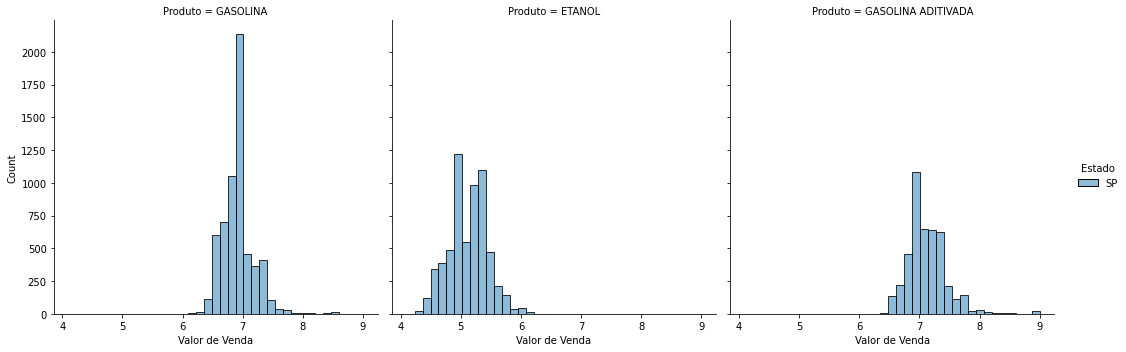

In [21]:
fig = sns.displot(data = df, x= "Valor de Venda", hue="Estado", col="Produto")
plt.show(fig)


In [22]:
base_Municipio.head()

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
4540,SP,SAO PAULO,BOM RETIRO,GASOLINA,2022-06-04,6.599,R$ / litro
4541,SP,SAO PAULO,BOM RETIRO,ETANOL,2022-06-04,4.499,R$ / litro
4542,SP,SAO PAULO,SANTA CECILIA,GASOLINA ADITIVADA,2022-06-04,6.999,R$ / litro
4543,SP,SAO PAULO,SANTA CECILIA,GASOLINA,2022-06-04,6.899,R$ / litro
4544,SP,SAO PAULO,SANTA CECILIA,ETANOL,2022-06-04,4.799,R$ / litro


In [27]:
base_media = []

for i in base_Municipio.index:
    base_media.append(base_Municipio['Valor de Venda'].loc[i].mean())
    
#base_media

base_Municipio['media'] = base_media

base_Municipio

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,media
4540,SP,SAO PAULO,BOM RETIRO,GASOLINA,2022-06-04,6.599,R$ / litro,6.599
4541,SP,SAO PAULO,BOM RETIRO,ETANOL,2022-06-04,4.499,R$ / litro,4.499
4542,SP,SAO PAULO,SANTA CECILIA,GASOLINA ADITIVADA,2022-06-04,6.999,R$ / litro,6.999
4543,SP,SAO PAULO,SANTA CECILIA,GASOLINA,2022-06-04,6.899,R$ / litro,6.899
4544,SP,SAO PAULO,SANTA CECILIA,ETANOL,2022-06-04,4.799,R$ / litro,4.799
...,...,...,...,...,...,...,...,...
54059,SP,SAO PAULO,VILA NOVA CURUCA,ETANOL,2022-04-27,5.090,R$ / litro,5.090
54060,SP,SAO PAULO,VILA NOVA CURUCA,GASOLINA ADITIVADA,2022-04-27,6.770,R$ / litro,6.770
54214,SP,SAO PAULO,VILA NOVA CURUCA,GASOLINA,2022-04-27,6.990,R$ / litro,6.990
54215,SP,SAO PAULO,VILA NOVA CURUCA,ETANOL,2022-04-27,5.290,R$ / litro,5.290


In [28]:
base_gasolina

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
49,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,7.059,R$ / litro
51,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.990,R$ / litro
54,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.970,R$ / litro
112,SP,ARACATUBA,JARDIM PAULISTA,GASOLINA,2022-01-04,6.899,R$ / litro
114,SP,ARACATUBA,JD UMUARAMA,GASOLINA,2022-01-04,6.999,R$ / litro
...,...,...,...,...,...,...,...
54905,SP,LINS,VILA SAO JOSE,GASOLINA,2022-04-25,7.029,R$ / litro
54917,SP,MOGI GUACU,JARDIM SOARES,GASOLINA,2022-04-28,6.799,R$ / litro
54926,SP,SANTO ANDRE,VILA GUIOMAR,GASOLINA,2022-04-25,6.999,R$ / litro
54941,SP,AVARE,JARDIM BRASIL,GASOLINA,2022-04-26,6.489,R$ / litro


In [34]:
base_gasolina

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
49,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,7.059,R$ / litro
51,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.990,R$ / litro
54,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.970,R$ / litro
112,SP,ARACATUBA,JARDIM PAULISTA,GASOLINA,2022-01-04,6.899,R$ / litro
114,SP,ARACATUBA,JD UMUARAMA,GASOLINA,2022-01-04,6.999,R$ / litro
...,...,...,...,...,...,...,...
54905,SP,LINS,VILA SAO JOSE,GASOLINA,2022-04-25,7.029,R$ / litro
54917,SP,MOGI GUACU,JARDIM SOARES,GASOLINA,2022-04-28,6.799,R$ / litro
54926,SP,SANTO ANDRE,VILA GUIOMAR,GASOLINA,2022-04-25,6.999,R$ / litro
54941,SP,AVARE,JARDIM BRASIL,GASOLINA,2022-04-26,6.489,R$ / litro


In [38]:
base_gasolina['5%'] = base_gasolina['Valor de Venda'] * 0.05
base_gasolina['8%'] = base_gasolina['Valor de Venda'] * 0.08
base_gasolina['10%'] = base_gasolina['Valor de Venda'] * 0.1

/var/folders/4q/d8w2y97d1j183kr7xlhfbt980000gn/T/ipykernel_48955/2356393067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_gasolina['5%'] = base_gasolina['Valor de Venda'] * 0.05
/var/folders/4q/d8w2y97d1j183kr7xlhfbt980000gn/T/ipykernel_48955/2356393067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_gasolina['8%'] = base_gasolina['Valor de Venda'] * 0.08
/var/folders/4q/d8w2y97d1j183kr7xlhfbt980000gn/T/ipykernel_48955/2356393067.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [39]:
base_gasolina

,Estado,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,5%,8%,10%
49,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,7.059,R$ / litro,0.35295,0.56472,0.7059
51,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.990,R$ / litro,0.34950,0.55920,0.6990
54,SP,SERTAOZINHO,CENTRO,GASOLINA,2022-01-04,6.970,R$ / litro,0.34850,0.55760,0.6970
112,SP,ARACATUBA,JARDIM PAULISTA,GASOLINA,2022-01-04,6.899,R$ / litro,0.34495,0.55192,0.6899
114,SP,ARACATUBA,JD UMUARAMA,GASOLINA,2022-01-04,6.999,R$ / litro,0.34995,0.55992,0.6999
...,...,...,...,...,...,...,...,...,...,...
54905,SP,LINS,VILA SAO JOSE,GASOLINA,2022-04-25,7.029,R$ / litro,0.35145,0.56232,0.7029
54917,SP,MOGI GUACU,JARDIM SOARES,GASOLINA,2022-04-28,6.799,R$ / litro,0.33995,0.54392,0.6799
54926,SP,SANTO ANDRE,VILA GUIOMAR,GASOLINA,2022-04-25,6.999,R$ / litro,0.34995,0.55992,0.6999
54941,SP,AVARE,JARDIM BRASIL,GASOLINA,2022-04-26,6.489,R$ / litro,0.32445,0.51912,0.6489


In [40]:
base_gasolina.to_csv('base_sp_gasolina.csv', index=False)